In [464]:
import numpy as np

def J(X,y,w):
    yhat = X@w
    return np.sum((y-yhat)**2/2)

def Jgrad(X,y,w):
    """The gradient of J with respect to w"""
    yhat = (X@w)
    difference = (y-yhat).reshape(X.shape[0],1)
    return np.sum(difference*(X),axis=0)/X.shape[0]

def Jgrad2(X,y,w):
    """Same as the above with slicker notation (credit to Jian)."""
    yhat = (X@w)
    return (y-yhat)@X/X.shape[0]

    

def fit_adeline(X,y,max_epochs=50,eta=0.1):
    """Takes X and y and returns a trained w"""
    n,d = X.shape
    w = np.random.randn(d)
    errors = []
    W_history = []
    for epoch in range(max_epochs):
        W_history.append(w.copy())
        #if epoch%(epoch//10+1) == 0:
        #    print(w,"error=",J(X,y,w))
        errors.append(J(X,y,w))
        dw = Jgrad(X,y,w)
        w += eta*dw
    return w,errors,W_history

def fit_adeline_simple(X,y,max_epochs=50,eta=0.1):
    """ I am including this minimalist version to show
        how remarkably simple Adeline is.
        The other implementation is fluffed up by recording
        w's and errors.
    """
    w = np.random.randn(X.shape[1])/10
    for epoch in range(max_epochs):
        w += eta*Jgrad(X,y,w)
    return w



In [465]:
## Some artificial data
N = 30
X = (np.random.rand(N).reshape(N//2,2) - 1/2)*10
## Adding a bias column
X = np.c_[np.ones(X.shape[0]),X]
X

array([[ 1.00000000e+00, -3.24596915e+00, -3.07646777e+00],
       [ 1.00000000e+00, -2.26334855e+00,  3.63222807e+00],
       [ 1.00000000e+00, -1.13292949e+00,  2.98590793e+00],
       [ 1.00000000e+00, -6.23194715e-02,  4.57092026e-01],
       [ 1.00000000e+00, -1.85490607e+00, -2.79039100e+00],
       [ 1.00000000e+00, -1.59947027e-01, -2.78299899e+00],
       [ 1.00000000e+00, -9.40667184e-02,  4.42318366e+00],
       [ 1.00000000e+00, -4.00328335e+00, -1.78936288e+00],
       [ 1.00000000e+00,  2.27972548e+00, -6.70114371e-01],
       [ 1.00000000e+00,  4.28137098e+00,  3.45742802e-03],
       [ 1.00000000e+00,  3.36975267e+00, -4.32443559e-01],
       [ 1.00000000e+00,  1.00820484e+00, -3.04889001e-01],
       [ 1.00000000e+00,  4.53001189e+00, -4.85247678e+00],
       [ 1.00000000e+00,  4.12721662e+00, -8.55360911e-01],
       [ 1.00000000e+00, -4.97096748e+00, -1.66128264e+00]])

In [466]:
### min-max scaling

mins = np.min(X,axis=0)[1:]
maxs = np.max(X,axis=0)[1:]
X[:,1:] = (X[:,1:]-mins)/(maxs-mins)
X

array([[1.        , 0.18156005, 0.19146982],
       [1.        , 0.28498314, 0.91472784],
       [1.        , 0.40396235, 0.84504869],
       [1.        , 0.51664653, 0.57241949],
       [1.        , 0.32797265, 0.22231148],
       [1.        , 0.506371  , 0.2231084 ],
       [1.        , 0.51330506, 1.        ],
       [1.        , 0.10185099, 0.33023135],
       [1.        , 0.76315216, 0.45089646],
       [1.        , 0.97382997, 0.52351358],
       [1.        , 0.87788004, 0.47651952],
       [1.        , 0.62932168, 0.49027105],
       [1.        , 1.        , 0.        ],
       [1.        , 0.95760487, 0.4309252 ],
       [1.        , 0.        , 0.34403956]])

In [467]:
import matplotlib.pyplot as plt

def plot_boundary(w,title="",X=np.empty([0,3]),y=[]):
    xaxis = np.linspace(-0.1,1.1,200)
    yaxis = np.linspace(-0.1,1.1,200)

    positive = [(a,b) for a in xaxis for b in yaxis if w.T@[1,a,b] >=0]
    negative = [(a,b) for a in xaxis for b in yaxis if w.T@[1,a,b] < 0]
    #assert(len(positive)>0)
    #assert(len(negative)>0)
    positive,negative = np.array(positive),np.array(negative)
    if len(positive)>0:
        plt.scatter(positive[:,0],positive[:,1],alpha=0.05)
    if len(negative)>0:
        plt.scatter(negative[:,0],negative[:,1],alpha=0.05)
    plt.title(title)
    if len(y)==0:
        plt.scatter(X[:,1],X[:,2],c="black")
    else:
        assert(set(y).issubset(set([-1,1])))
        Xpos,Xneg = X[y==1],X[y==-1]
        plt.scatter(Xpos[:,1],Xpos[:,2],c="black",marker="P")
        plt.scatter(Xneg[:,1],Xneg[:,2],c="black",marker="_")
    plt.show()



In [468]:
import numpy as np

phi = lambda z: z
phi = lambda z: (z >= 0)*2 -1


#np.random.seed(420)
#w = np.random.rand(3)/200
#0 = y0-mx0 + mx -y
x0,y0 = (0.5,0.5)
m = np.random.randn()
w = np.array([y0-m*x0,m,-1])
x = np.array([1,2,3])
w.T@x, phi(w.T@x)

(-1.8770907383607196, -1)

In [469]:
yhat = phi(X@w)
yhat


array([ 1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1])

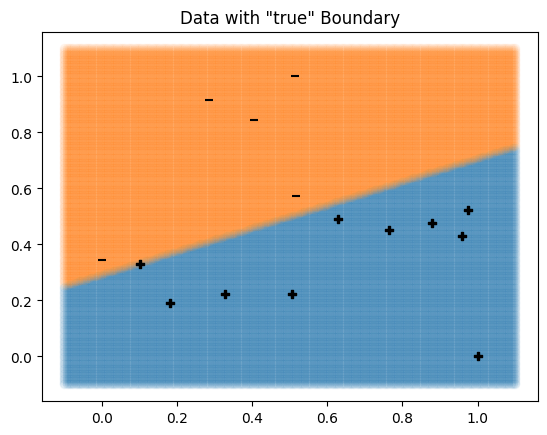

In [470]:
plot_boundary(w,X=X,y=yhat,title='Data with "true" Boundary')



In [471]:
y = phi(X@w)
w = np.random.randn(3)/10
y,w

(array([ 1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1]),
 array([ 0.05150863, -0.10819182, -0.03465332]))

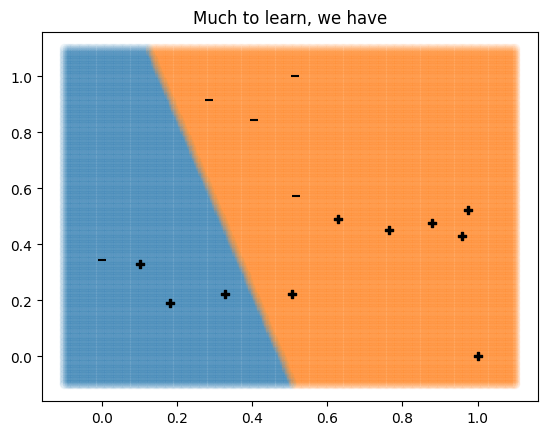

In [472]:
plot_boundary(w,X=X,y=y,title="Much to learn, we have")

In [473]:
w,errors,W_history= fit_adeline(X,y,max_epochs=5000,eta=0.1)
W_history = np.array(W_history)
w


array([ 0.8248776 ,  1.13152739, -2.34750493])

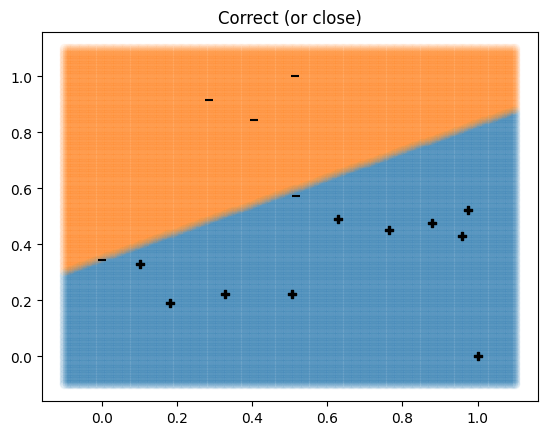

In [474]:
plot_boundary(w,X=X,y=y,title="Correct (or close)")

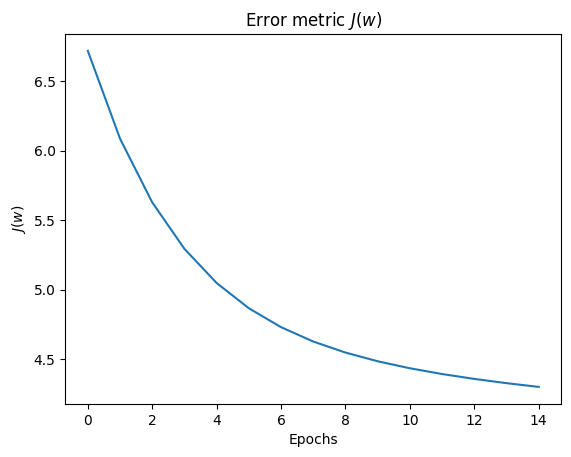

In [475]:
plt.plot(errors[:15])
plt.title(r"Error metric $J(w)$")
plt.xlabel("Epochs")
plt.ylabel(r"$J(w)$")
plt.show()

In [476]:
w

array([ 0.8248776 ,  1.13152739, -2.34750493])

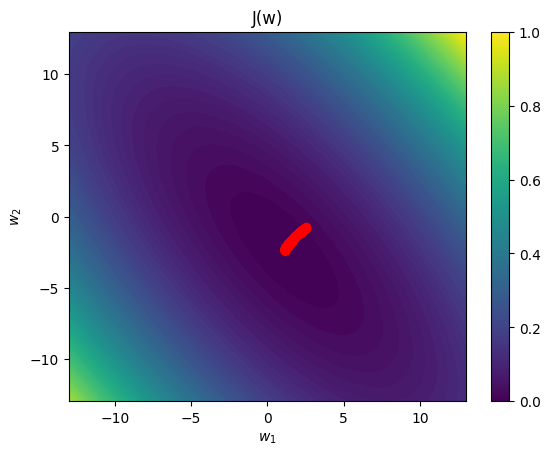

In [477]:
realaxis = np.linspace(-13,13,500)
w0 = w[0]
w1,w2 = np.meshgrid(realaxis,realaxis)
heat = J(X,y,np.array([w0,w1,w2],dtype="object"))
h = plt.contourf(w1,w2,heat,levels=100)
plt.scatter(W_history[:,1],W_history[:,2],c="red")
plt.xlabel(r"$w_1$")
plt.ylabel(r"$w_2$")
plt.title("J(w)")
plt.colorbar()
plt.show()

In [478]:
W_history[:10],W_history[-10:]

(array([[-0.23763364,  2.56556751, -0.74022224],
        [-0.28340458,  2.52788506, -0.77235793],
        [-0.32107605,  2.49489552, -0.80049705],
        [-0.35189642,  2.465886  , -0.82524938],
        [-0.37692248,  2.44025293, -0.84713115],
        [-0.39704886,  2.4174853 , -0.86657939],
        [-0.4130329 ,  2.39715045, -0.88396408],
        [-0.42551573,  2.37888205, -0.89959845],
        [-0.43504005,  2.36236992, -0.91374768],
        [-0.44206531,  2.34735142, -0.92663626]]),
 array([[ 0.8248776 ,  1.13152739, -2.34750493],
        [ 0.8248776 ,  1.13152739, -2.34750493],
        [ 0.8248776 ,  1.13152739, -2.34750493],
        [ 0.8248776 ,  1.13152739, -2.34750493],
        [ 0.8248776 ,  1.13152739, -2.34750493],
        [ 0.8248776 ,  1.13152739, -2.34750493],
        [ 0.8248776 ,  1.13152739, -2.34750493],
        [ 0.8248776 ,  1.13152739, -2.34750493],
        [ 0.8248776 ,  1.13152739, -2.34750493],
        [ 0.8248776 ,  1.13152739, -2.34750493]]))

# Assignment Sketch

### The dataset

We will use the [amphibians](https://archive.ics.uci.edu/ml/datasets/Amphibians) dataset from the UCI ML Repo.

The data needs some preprocessing, such as the following.

1. Drop the ID column
2. Convert the Motorway column to an integer. Replace **A1** with 1 and **S52** with 0.
3. Select one of the frog or toad columns to be the target and copy it into `y` (for example "tree frog"). Replace 0 with -1 so that the classes are $\pm 1$.
4. Copy all the columns that are not frog or toad columns into `X`.
5. Scale the data `X` using Z-score scaling or min-max scaling (your choice).
6. Add a bias column to `X`.

Now you have `X` and `y` and you are ready to do some ML using Adeline.

First try the implementation of Adeline from class on the data and see what kind of accuracy you can get (try tuning $\eta$ a bit and plotting the error curves).

Then it is time for you to write some code...

### Specifications

In class we implemented "vanilla" Adeline.  We used batch gradient descent.

Using this code as a base, implement

1. Adeline using stochastic gradient descent
2. Adeline using mini-batch gradient descent with batches of size 32. 

You can do this by implementing a `fit_adeline_sgd` function (that obviously uses SGD to find `w`) and a `fit_adeline_mbsgd` function that uses mini-batch SGD.  For the latter add `batch_size` as a parameter and give it a default value of 32.

For each approach, plot something like the figure above titled "**Error metric $J(w)$**".

When that works add another twist: shuffling `X` and `y` between epochs.  Note that you need to give `X` and `y` the same shuffle so that the rows correspond after shuffling. 

Does that speed up convergence?

What about trying three different versions of $\eta$?

Try $\eta=0.1$, $\eta=0.01$ and $\eta=0.001$.

Try plotting the error curves for the three versions of $\eta$ all in the same plot.

If you have time see if you can improve SGD performance by using an adaptive learning rate that deceases over time (as described in the book).

If $t$ is the number of iterations, the formula for an adaptive learning rate is

$$\eta(t) = \frac{c_1}{t+c_2}$$

where $c_1$ and $c_2$ are constants that you determine experimentally.  I have no idea what they should be.  Perhaps try $c_1 = c_2 = 1$ as a first guess.

Tuning constants like $c_1$ and $c_2$ is an example of "fitting hyperparameters".  A "hyperparameter" is a parameter of an ML model that is not "fit" during the learning process. The weight vector `w` is a regular parameter because it gets trained automatically.  But for hyperparameters like $c_1$ and $c_2$ you often need to experimentally grope around a bit.




### Solution to Assignment

This is my approach to solving the assignment specified above. There are many ways to skin a cat, and your approach may be different.

First, we load the data. 

In [479]:
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00528/dataset.csv"
df = pd.read_csv(url,delimiter=';',skiprows=1)
df["Motorway"] = df["Motorway"].replace("A1",1).replace("S52",0)
df.head()


,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1


In [480]:
df.dtypes

ID                    int64
Motorway              int64
SR                    int64
NR                    int64
TR                    int64
VR                    int64
SUR1                  int64
SUR2                  int64
SUR3                  int64
UR                    int64
FR                    int64
OR                    int64
RR                    int64
BR                    int64
MR                    int64
CR                    int64
Green frogs           int64
Brown frogs           int64
Common toad           int64
Fire-bellied toad     int64
Tree frog             int64
Common newt           int64
Great crested newt    int64
dtype: object

### Build X and y

Below we create the numpy version of the data, `X` and `y`.

In [481]:
X,y = df.loc[:,"Motorway":"CR"].values,df.loc[:,"Tree frog"].values
y=2*y-1


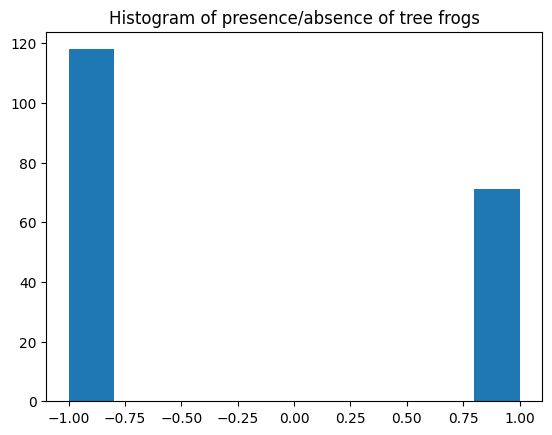

In [482]:
import matplotlib.pyplot as plt
plt.hist(y)
plt.title("Histogram of presence/absence of tree frogs")
plt.show()

### Scaling

We scale the data and add a bias column.

In [483]:
means = X.mean(axis=0)
stds = X.std(axis=0)
Z = np.c_[np.ones(X.shape[0]),(X-means)/stds]
Z

array([[ 1.        ,  1.16726175, -0.19580605, ..., -0.95014023,
        -0.16081688, -0.12700013],
       [ 1.        ,  1.16726175, -0.19363843, ..., -0.57048589,
        -0.16081688, -0.12700013],
       [ 1.        ,  1.16726175, -0.20447653, ..., -0.57048589,
        -0.16081688, -0.12700013],
       ...,
       [ 1.        , -0.85670587, -0.19797367, ...,  0.94813148,
        -0.16081688, -0.12700013],
       [ 1.        , -0.85670587, -0.20230891, ..., -0.95014023,
        -0.16081688, -0.12700013],
       [ 1.        , -0.85670587, -0.20230891, ..., -0.57048589,
        -0.16081688, -0.12700013]])

### Adaline classic 

We use the vanilla version of Adaline on the data we just loaded.

The first plot shows how different orders of magnitude for $\eta$ perform.

If $\eta=1$ then convergence does not occur at all.

Usually we just try to get the order of magnitude right for hyperparameters like $\eta$.

You could refine things a bit more by finding the best power of 2 rather than the best power of ten.


In [484]:
w_eta_tenth,errors_eta_tenth,W_history= fit_adeline(Z,y,max_epochs=5000,eta=0.1)
w,errors_eta_hundredth,W_history= fit_adeline(Z,y,max_epochs=5000,eta=0.01)
w,errors_eta_thousanth,W_history= fit_adeline(Z,y,max_epochs=5000,eta=0.001)


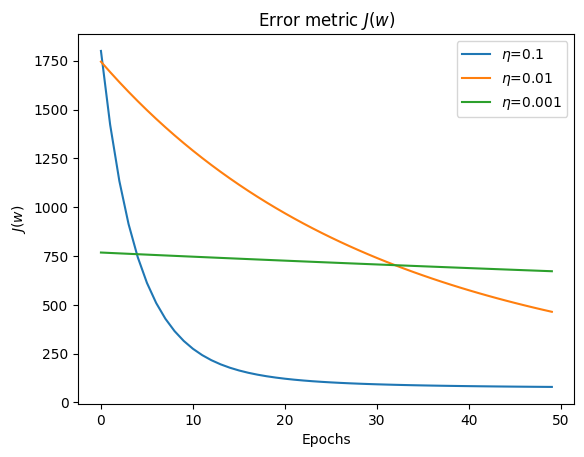

In [485]:
plt.plot(errors_eta_tenth[:50],label=r"$\eta$=0.1")
plt.plot(errors_eta_hundredth[:50],label=r"$\eta$=0.01")
plt.plot(errors_eta_thousanth[:50],label=r"$\eta$=0.001")

plt.title(r"Error metric $J(w)$")
plt.xlabel("Epochs")
plt.ylabel(r"$J(w)$")
plt.legend()
plt.show()

In [486]:
w,errors_eta_tenth,W_history= fit_adeline(Z,y,max_epochs=5000,eta=0.1)
accuracies = [np.sum(y==phi(Z@w))/len(y)  for w in W_history[:3000]]

min(errors_eta_tenth),max(accuracies)

(72.89330297531069, 0.6825396825396826)

### Adaline Classic Performance.

This is a fairly tough dataset.  It seems that it will hard to get accuracy much about 70% on the training set.

That is fine -- it just means that there are other variables determining tree frog presence which we cannot see in this data.

In the plot below, notice that in *batch* Adaline there is very little variance in accuracy.

The algorithm finds the minimizing `w` and stays there.

Look for this to be different when we switch to SGD.


Adaline with regular gradient descent


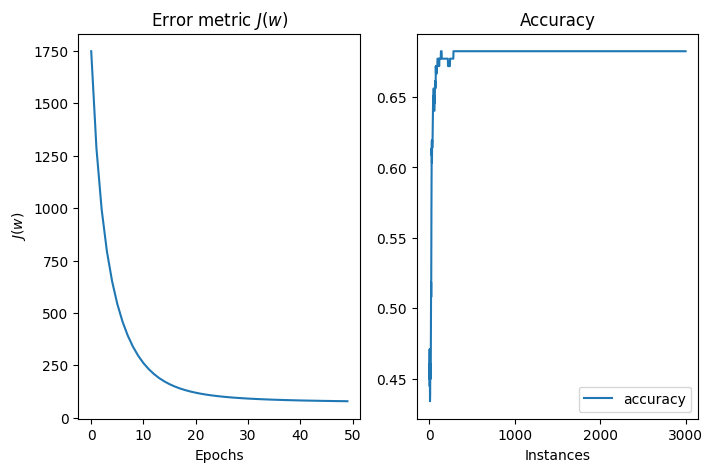

In [487]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(8,5)

ax1.plot(errors_eta_tenth[:50],label=r"$J(w)$, $\eta$=0.001")
ax1.set_ylabel(r"$J(w)$")
ax1.set_xlabel("Epochs")
ax1.set_title(r"Error metric $J(w)$")


ax2.plot(accuracies,label=r"accuracy")

ax2.set_title(r"Accuracy")
ax2.set_xlabel("Instances")
plt.legend()
print("Adaline with regular gradient descent")
plt.show()


### Confusion Matrix

Accuracy is a fine error metric but often it is good to know not just that you made a mistake, but how you made it.

That is what a confusion matrix shows.

In particular we see here that we mistakenly say the frog is absent twice as often as we mistakenly say the frog is present.



In [488]:
print("Confusion matrix...")
yhat = phi(Z@w)
print(f"Frog present, predicted absent   {np.sum((y==1)&(yhat==-1)):3} times.")
print(f"Frog present, predicted present  {np.sum((y==1)&(yhat==1)):3} times.")
print(f"Frog absent,  predicted absent   {np.sum((y==-1)&(yhat==-1)):3} times.")
print(f"Frog absent,  predicted present  {np.sum((y==-1)&(yhat==1)):3} times.")

Confusion matrix...
Frog present, predicted absent    39 times.
Frog present, predicted present   32 times.
Frog absent,  predicted absent    97 times.
Frog absent,  predicted present   21 times.


### Stochastic Gradient Descent

Now we do our first version of Adaline using SGD.

Note that the sole difference from the perceptron is 

```
            yhat_i = x_i@w
```

rather than

```
            yhat_i = phi(x_i@w)
```

In the graphs below showing performance, note that "cycles" occur in the accuracy plot.

Watch for these to disappear when we make `permutations=True`.



In [489]:
def fit_adeline_sgd(X,y,max_epochs=500,eta=0.01,permute=False):
    w = np.random.randn(X.shape[1])/10
    W_history = []
    errors = []
    for epoch in range(max_epochs):
        if permute:
            p=np.random.permutation(X.shape[0])
            X = X[p]
            y = y[p]
        for x_i,y_i in zip(X,y):
            W_history.append(w.copy())
            yhat_i = x_i@w
            dw = eta*(y_i-yhat_i)*x_i
            w += dw
        errors.append(J(X,y,w))

    return w,errors,W_history
w,errors,W_history= fit_adeline_sgd(Z,y,max_epochs=5000,eta=0.001)
accuracies = [np.sum(y==phi(Z@w))/len(y)  for w in W_history[:3000]]

min(errors),max(accuracies)


(73.06816461275915, 0.6931216931216931)

Adaline with SGD


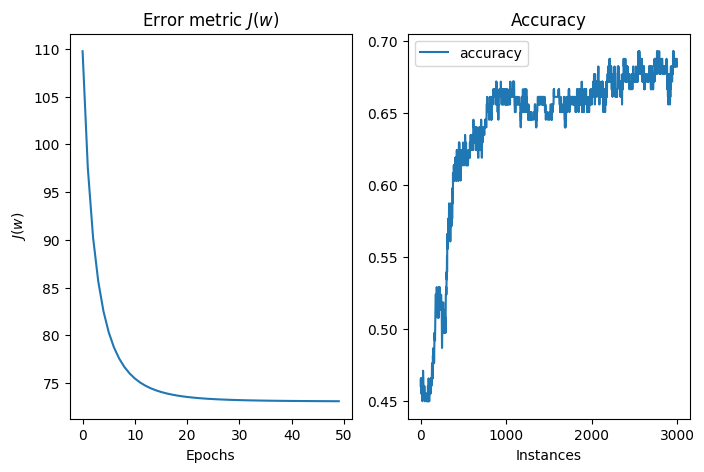

In [490]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(8,5)

ax1.plot(errors[:50],label=r"$J(w)$, $\eta$=0.001")
ax1.set_ylabel(r"$J(w)$")
ax1.set_xlabel("Epochs")
ax1.set_title(r"Error metric $J(w)$")


ax2.plot(accuracies,label=r"accuracy")

ax2.set_title(r"Accuracy")
ax2.set_xlabel("Instances")
plt.legend()
print("Adaline with SGD")
plt.show()


In [491]:
w,errors,W_history= fit_adeline_sgd(Z,y,max_epochs=5000,eta=0.001,permute=True)
accuracies = [np.sum(y==phi(Z@w))/len(y)  for w in W_history[:3000]]

min(errors),max(accuracies)

(72.89361108879156, 0.6984126984126984)

Adaline with SGD and permutations every epoch


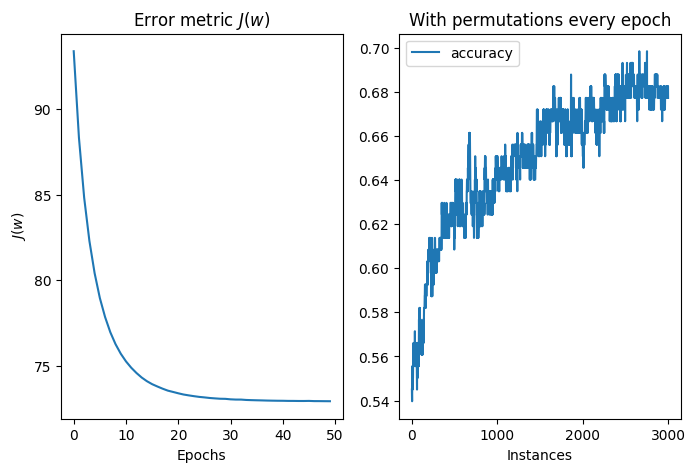

In [492]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(8,5)

ax1.plot(errors[:50],label=r"$J(w)$, $\eta$=0.001")
ax1.set_ylabel(r"$J(w)$")
ax1.set_xlabel("Epochs")
ax1.set_title(r"Error metric $J(w)$")


ax2.plot(accuracies,label=r"accuracy")

ax2.set_title(r"Accuracy")
ax2.set_xlabel("Instances")
plt.title("With permutations every epoch")
plt.legend()
print("Adaline with SGD and permutations every epoch")
plt.show()

### Mini-batch Gradient Descent

Below we implement mini-batch gradient descent.

You might want to read about and experiment with `np.array_split` to understand what is happening.

In the output plots notice that the variance in the accuracy plot increases as the batch size goes down.

When the batch size is 1 this plot would look like regular SGD.

In [493]:
def fit_adeline_mbsgd(X,y,max_epochs=50,eta=0.01,batch_size=32):
    """Takes X and y and returns a trained w"""
    n,d = X.shape
    w = np.random.randn(d)
    errors = []
    W_history = []
    for epoch in range(max_epochs):
        p = np.random.permutation(X.shape[0])
        X,y = X[p],y[p]
        X_split,y_split = np.array_split(X,X.shape[0]//batch_size),np.array_split(y,X.shape[0]//batch_size)
        for X_0,y_0 in zip(X_split,y_split):        
            W_history.append(w.copy())
            dw = Jgrad(X_0,y_0,w)
            w += eta*dw
        errors.append(J(X,y,w))

    return w,errors,W_history

In [494]:
w,errors,W_history= fit_adeline_mbsgd(Z,y,max_epochs=5000,eta=0.01)
accuracies = [np.sum(y==phi(Z@w))/len(y)  for w in W_history[:3000]]

min(errors),max(accuracies)

(72.89331328967373, 0.7037037037037037)

Adaline with mini-batch SGD, batch size = 32


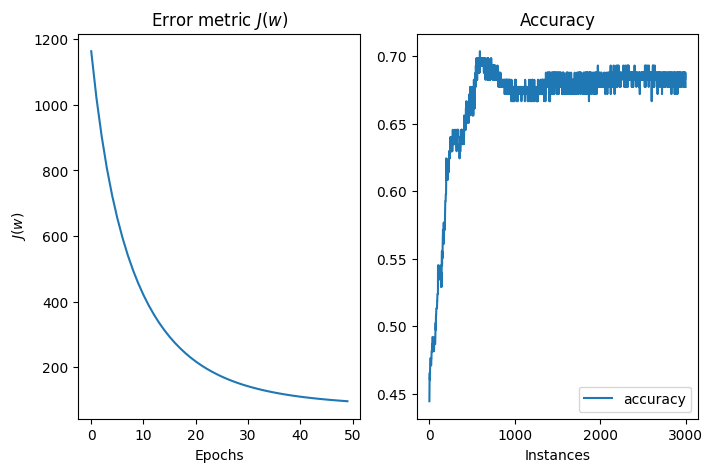

In [495]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(8,5)

ax1.plot(errors[:50],label=r"$J(w)$, $\eta$=0.001")
ax1.set_ylabel(r"$J(w)$")
ax1.set_xlabel("Epochs")
ax1.set_title(r"Error metric $J(w)$")


ax2.plot(accuracies,label=r"accuracy")

ax2.set_title(r"Accuracy")
ax2.set_xlabel("Instances")
plt.legend()
print("Adaline with mini-batch SGD, batch size = 32")
plt.show()

Adaline with mini-batch SGD, batch size = 10


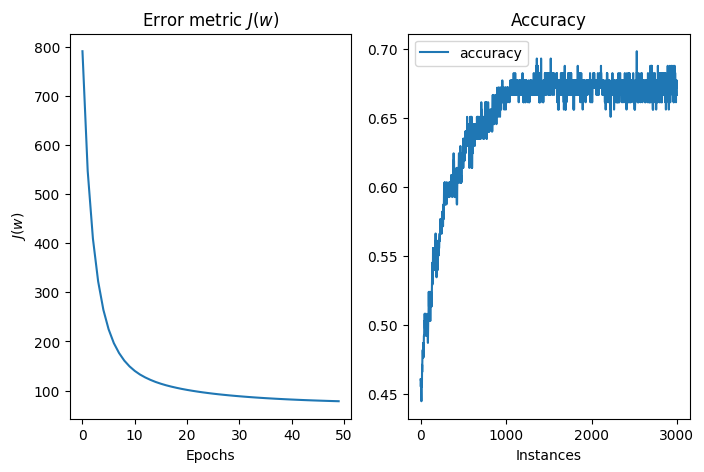

In [496]:
w,errors,W_history= fit_adeline_mbsgd(Z,y,max_epochs=5000,eta=0.01,batch_size=10)
accuracies = [np.sum(y==phi(Z@w))/len(y)  for w in W_history[:3000]]

min(errors),max(accuracies)
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(8,5)

ax1.plot(errors[:50],label=r"$J(w)$, $\eta$=0.001")
ax1.set_ylabel(r"$J(w)$")
ax1.set_xlabel("Epochs")
ax1.set_title(r"Error metric $J(w)$")


ax2.plot(accuracies,label=r"accuracy")

ax2.set_title(r"Accuracy")
ax2.set_xlabel("Instances")
plt.legend()
print("Adaline with mini-batch SGD, batch size = 10")
plt.show()

### Adaptive Learning Rate

We now add code to implement an adaptive learning rate.

The default values of $c_1$ and $c_2$ do not work well.

Below we try other values, and also implement a "grid search" for the best values of $c_1$ and $c_2$ at the level of order-of-magnitude.

Note in the accuracy plot that as time goes on the variance in the accuracy goes away.

This happens because $\eta \rightarrow 0$, which essentially freezes $w$ and makes the update step irrelevant.

In [497]:

def fit_adeline_sgd_al(X,y,max_epochs=500,eta=0.01,permute=False,c1=1,c2=1):
    """sgd with adaptive learning rate"""
    w = np.random.randn(X.shape[1])/10
    W_history = []
    errors = []
    for epoch in range(max_epochs):
        if permute:
            p=np.random.permutation(X.shape[0])
            X = X[p]
            y = y[p]
        for x_i,y_i in zip(X,y):
            W_history.append(w.copy())
            yhat_i = x_i@w
            eta = c1/(len(W_history)+c2)
            dw = eta*(y_i-yhat_i)*x_i
            w += dw
        errors.append(J(X,y,w))

    return w,errors,W_history
w,errors,W_history= fit_adeline_sgd_al(Z,y,max_epochs=5000,eta=0.001)
accuracies = [np.sum(y==phi(Z@w))/len(y)  for w in W_history[:3000]]

min(errors),max(accuracies)


(96.12202109186848, 0.544973544973545)

Adaline with SGD, adaptive learning rate


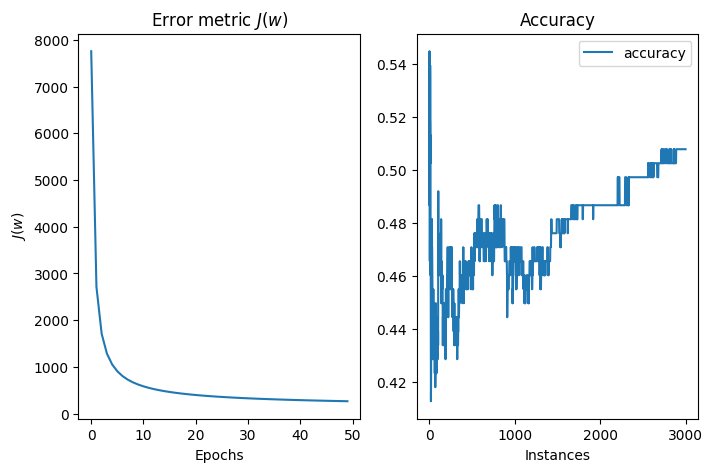

In [498]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(8,5)

ax1.plot(errors[:50],label=r"$J(w)$, $\eta$=0.001")
ax1.set_ylabel(r"$J(w)$")
ax1.set_xlabel("Epochs")
ax1.set_title(r"Error metric $J(w)$")


ax2.plot(accuracies,label=r"accuracy")

ax2.set_title(r"Accuracy")
ax2.set_xlabel("Instances")
plt.legend()
print("Adaline with SGD, adaptive learning rate")
plt.show()

Adaline with SGD, adaptive learning rate, broader view


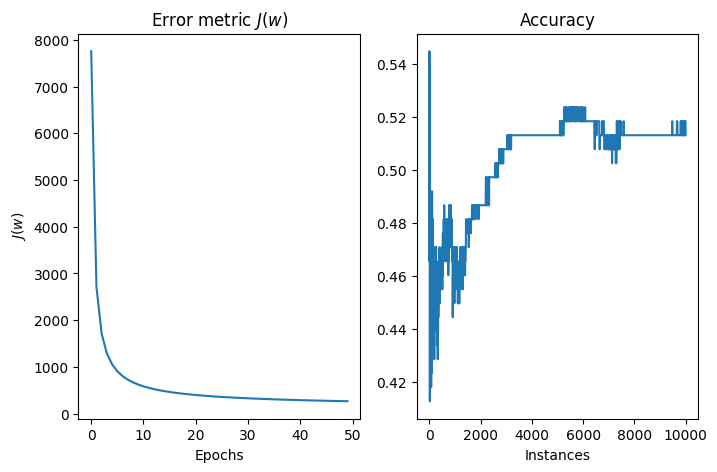

In [499]:
accuracies = [np.sum(y==phi(Z@w))/len(y)  for w in W_history[:10000]]

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(8,5)

ax1.plot(errors[:50],label=r"$J(w)$, $\eta$=0.001")
ax1.set_ylabel(r"$J(w)$")
ax1.set_xlabel("Epochs")
ax1.set_title(r"Error metric $J(w)$")


ax2.plot(accuracies,label=r"accuracy")

ax2.set_title(r"Accuracy")
ax2.set_xlabel("Instances")
print("Adaline with SGD, adaptive learning rate, broader view")

plt.show()

Adaline with SGD, adaptive learning rate, $c_2=100$


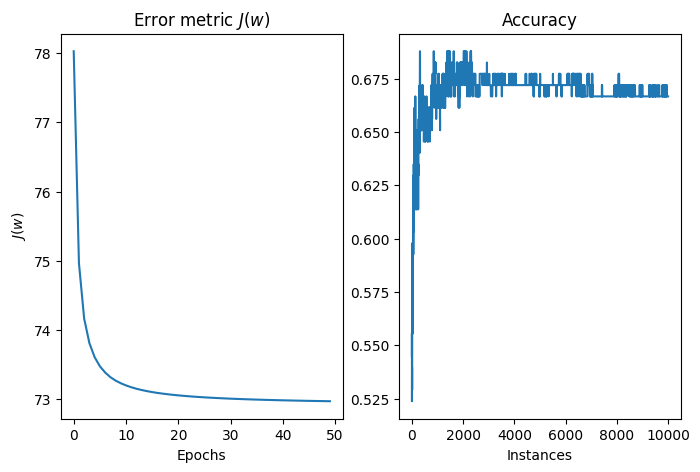

In [506]:
w,errors,W_history= fit_adeline_sgd_al(Z,y,max_epochs=5000,eta=0.001,c2=100,permute=True)
accuracies = [np.sum(y==phi(Z@w))/len(y)  for w in W_history[:10000]]

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(8,5)

ax1.plot(errors[:50],label=r"$J(w)$, $\eta$=0.001")
ax1.set_ylabel(r"$J(w)$")
ax1.set_xlabel("Epochs")
ax1.set_title(r"Error metric $J(w)$")


ax2.plot(accuracies,label=r"accuracy")

ax2.set_title(r"Accuracy")
ax2.set_xlabel("Instances")
print(r"Adaline with SGD, adaptive learning rate, $c_2=100$")

plt.show()

In [501]:
c1s = [10**i for i in range(-2,4)]
c2s = [10**i for i in range(-2,4)]
results = np.zeros(len(c1s)*len(c2s)).reshape(len(c1s),len(c2s))
for i,c1 in enumerate(c1s):
    for j,c2 in enumerate(c2s):
        w,errors,W_history= fit_adeline_sgd_al(Z,y,max_epochs=60,eta=0.001,c1=c1,c2=c2,permute=True)
        acc = np.sum(y==phi(Z@w))/len(y)
        results[i,j] = acc


/var/folders/ht/7rqyw9hs3fj63k5lvf08qhdh0000gn/T/ipykernel_4476/4169872299.py:5: RuntimeWarning: overflow encountered in square
  return np.sum((y-yhat)**2/2)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/ht/7rqyw9hs3fj63k5lvf08qhdh0000gn/T/ipykernel_4476/1703979512.py:15: RuntimeWarning: overflow encountered in double_scalars
  dw = eta*(y_i-yhat_i)*x_i
/var/folders/ht/7rqyw9hs3fj63k5lvf08qhdh0000gn/T/ipykernel_4476/1703979512.py:13: RuntimeWarning: invalid value encountered in matmul
  yhat_i = x_i@w
/var/folders/ht/7rqyw9hs3fj63k5lvf08qhdh0000gn/T/ipykernel_4476/1703979512.py:13: RuntimeWarning: overflow encountered in matmul
  yhat_i = x_i@w
/var/folders/ht/7rqyw9hs3fj63k5lvf08qhdh0000gn/T/ipykernel_4476/1703979512.py:15: RuntimeWarning: overflow encountered in multiply
  dw = eta*(y_i-yhat_i)*x_i
/var

In [502]:
print(results)

[[0.5026455  0.53439153 0.49206349 0.44444444 0.51851852 0.53439153]
 [0.64021164 0.61904762 0.64550265 0.65079365 0.6031746  0.57142857]
 [0.66137566 0.62962963 0.61904762 0.66666667 0.68783069 0.64021164]
 [0.47619048 0.53439153 0.48148148 0.47619048 0.66666667 0.68253968]
 [0.48677249 0.4973545  0.52380952 0.54497354 0.47089947 0.52910053]
 [0.62433862 0.62433862 0.62433862 0.62433862 0.62433862 0.62433862]]


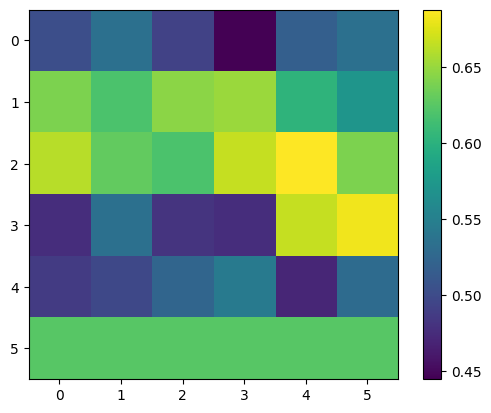

In [504]:
plt.imshow(results)
plt.colorbar()

### Take a look at `w`

Sometimes it can be informative to look at `w`. 

Big negative numbers mean that the corresponding feature has a negative effect on frog presence.

For positive numbers, the opposite is true.


In [530]:
print("bias = ",w[0])
for ww,cn in zip(w[1:],df.columns[1:16]):
    print(f"{ww:6.2f} {cn:<15}")

bias =  -0.24862238237146048
 -0.18 Motorway       
  0.01 SR             
  0.08 NR             
 -0.06 TR             
  0.16 VR             
 -0.14 SUR1           
 -0.09 SUR2           
  0.03 SUR3           
  0.01 UR             
 -0.01 FR             
 -0.11 OR             
  0.09 RR             
  0.01 BR             
 -0.06 MR             
 -0.10 CR             


### Amphibian correlation

We threw out all the amphibians except for tree frogs.

How strong are the correlations between amphibians?

Not very, actually.


In [513]:
df.loc[:,"Green frogs":].corr()

,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
Green frogs,1.000000,0.062999,0.250805,0.321241,0.252307,0.390788,0.102062
Brown frogs,0.062999,1.000000,0.321587,0.155375,0.090182,0.238879,0.104390
Common toad,0.250805,0.321587,1.000000,0.191934,0.331611,0.312692,0.220534
Fire-bellied toad,0.321241,0.155375,0.191934,1.000000,0.312967,0.452751,0.312317
Tree frog,0.252307,0.090182,0.331611,0.312967,1.000000,0.289278,0.351501
Common newt,0.390788,0.238879,0.312692,0.452751,0.289278,1.000000,0.421831
Great crested newt,0.102062,0.104390,0.220534,0.312317,0.351501,0.421831,1.000000


### Improving performance with more features

Probably the other amphibians give *some* information about whether or not a tree frog is present.

We redo the ML experiment, but now let the learner see all the amphibian columns (except the target column).

You can see that the accuracy does improve considerably.


In [531]:
X,y = df.loc[:,[c for c in df.columns if c not in ["ID","Tree frog"]]].values,df.loc[:,"Tree frog"].values
y=2*y-1

In [532]:
means = X.mean(axis=0)
stds = X.std(axis=0)
Z = np.c_[np.ones(X.shape[0]),(X-means)/stds]

In [535]:
w,errors,W_history= fit_adeline_sgd(Z,y,max_epochs=200,eta=0.001,permute=True)
accuracies = [np.sum(y==phi(Z@w))/len(y)  for w in W_history[:3000]]

min(errors),max(accuracies)

(60.16258531685338, 0.7883597883597884)

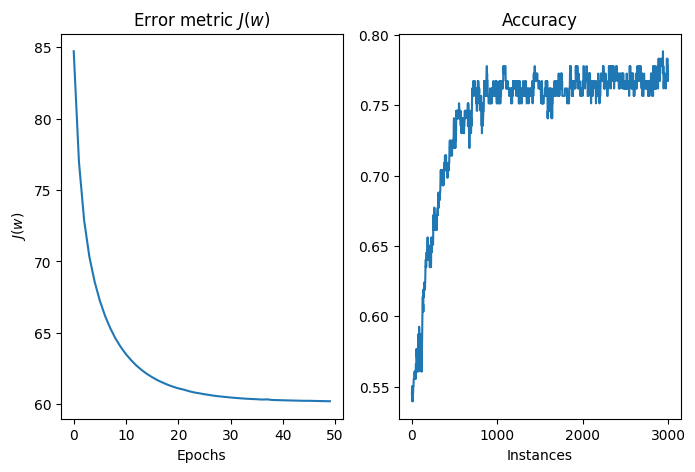

In [536]:

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(8,5)

ax1.plot(errors[:50],label=r"$J(w)$, $\eta$=0.001")
ax1.set_ylabel(r"$J(w)$")
ax1.set_xlabel("Epochs")
ax1.set_title(r"Error metric $J(w)$")


ax2.plot(accuracies,label=r"accuracy")

ax2.set_title(r"Accuracy")
ax2.set_xlabel("Instances")

plt.show()


In [537]:
J(Z,y,w)

60.16460506020933